This python notebook deals with solving the titanic problem in kaggel. The objective of this project is to build a predictive model that would accurately predict whether a person lives or dies. 

We shall start with importing necessary libraries and then load the data.

In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl

Loading the data as pandas dataframe. Then we will try to understand the data and look out for missing values.

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [40]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
for x in df.columns: print(x, ":", sum(df[x].isnull()))

PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 687
Embarked : 2


In [19]:
df[["Pclass", "Cabin"]][:20]

,Pclass,Cabin
0,3,NaN
1,1,C85
2,3,NaN
3,1,C123
4,3,NaN
5,3,NaN
6,1,E46
7,3,NaN
8,3,NaN
9,2,NaN


In [27]:
df.iloc[27]

PassengerId                                28
Survived                                    0
Pclass                                      1
Name           Fortune, Mr. Charles Alexander
Sex                                      male
Age                                        19
SibSp                                       3
Parch                                       2
Ticket                                  19950
Fare                                      263
Cabin                             C23 C25 C27
Embarked                                    S
Name: 27, dtype: object

As embarked has only two missing values we shall omit thoes rows.

In [30]:
rows = df.index[df.Embarked.isnull() == True]
rows

Int64Index([61, 829], dtype='int64')

In [41]:
df.iloc[rows]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [45]:
df = df.drop(df.index[rows])
df.shape

(889, 12)

Lets check if the missing values in embarked were actually deleted.

In [46]:
sum(df.Embarked.isnull() == True)

0

Lets work on the missing values in Cabin column. Looks like majority of the data in cabin column are missing. Should we delete the whole column? Lets try building our model ignoring the Cabin column.

In [47]:
df = df.drop("Cabin", axis = 1)

In [48]:
df.shape

(889, 11)

In [52]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [54]:
for x in df.columns: print(x, ":", sum(df[x].isnull()==True))

PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Embarked : 0


Now we only have Age column which has 177 missing values. Lets plot age without missing values to see how it looks.

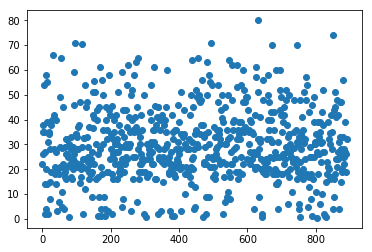

In [65]:
plt.scatter(df.index, df.Age)

In [66]:
df.Age.describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [67]:
df.Name[:20]

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

We will use the name column to extract passenger's title and use that to impute missing age values. For that lets create a new column named Title.

In [71]:
df.Name.dtype

dtype('O')

In [109]:
k = []
for x in df.Name: 
    k.append(x.split(","))

In [110]:
Title = []
for x in k:
    #x = x.str.strip()
    p = x[1].split(".")
    p[0] = p[0].strip()
    Title.append(p[0])

In [144]:
df["Title"] = Title
df.Title.value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Don               1
the Countess      1
Mme               1
Capt              1
Sir               1
Ms                1
Lady              1
Jonkheer          1
Name: Title, dtype: int64

In [142]:
for x in df.index:
    if (((df.Title[x] != "Mr") and (df.Title[x] != "Miss") and (df.Title[x] != "Mrs") and (df.Title[x] != "Master")) == True):
        df.Title[x] = "Other"

/Users/ravitejachikkam/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [143]:
df.Title.value_counts()

Mr        517
Miss      181
Mrs       124
Master     40
Other      27
Name: Title, dtype: int64

Now we shall use these categories to impute missing data in the age variable. We will be using mean of each group to replace missing age value.